# Ejercicio de programación Regresión Lineal

In [148]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [149]:
# utilizado para manejos de directorios y rutas
import os

# Computacion vectorial y cientifica para python
import numpy as np

# Librerias para graficación (trazado de gráficos)
from matplotlib import pyplot
from mpl_toolkits.mplot3d import Axes3D  # Necesario para graficar superficies 3D

# llama a matplotlib a embeber graficas dentro de los cuadernillos
%matplotlib inline

## 1 Regresión lineal con una variable
El archivo honey_purity_dataset.csv contiene el dataset para el problema de regresión lineal.
La primera columna es la pureza de la miel (en porcentaje u otra escala de calidad) y la segunda columna es el precio de la miel (en la moneda definida en el dataset).
El objetivo es predecir el precio de la miel en función de su pureza.

In [150]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [151]:
# Leer dataset completo
df = pd.read_csv('/content/drive/MyDrive/SIS420-INTELIGENCIA ARTIFICIAL/DATASET/honey_purity_dataset.csv')

# Crear data con solo Purity y Price
data = df[['Purity', 'Price']].values

# Separar en X e y
X, y = data[:, 0], data[:, 1]

# Número de ejemplos
m = y.size

# --- Normalización de X (Z-score: media 0, varianza 1) ---
mu = np.mean(X)
sigma = np.std(X)
X_norm = (X - mu) / sigma

#hace que combieta en numero
np.set_printoptions(precision=2, suppress=True)
#print("Número de ejemplos:", m)
#print("Primeras 5 filas de data:\n", data[:5])
#print("Primeros 5 valores de X (Purity):", X[:5])
#print("Primeros 5 valores de y (Price):", y[:5])

In [152]:
print(data)

[[  0.68 645.24]
 [  0.89 385.85]
 [  0.66 639.64]
 ...
 [  0.64 615.46]
 [  0.97 949.32]
 [  0.64 384.48]]


In [153]:
print(X)

[0.68 0.89 0.66 ... 0.64 0.97 0.64]


In [154]:
print(y)

[645.24 385.85 639.64 ... 615.46 949.32 384.48]


In [155]:
print(X.size)

247903


### 1.1 Trazar los datos

In [156]:
import matplotlib.pyplot as pyplot

def plotData(x, y):
    # Grafica los puntos x e y en una figura nueva.

    fig = pyplot.figure()  # abre una nueva figura

    pyplot.plot(x, y, 'ro', ms=10, mec='k')
    pyplot.ylabel('Precio de la miel')
    pyplot.xlabel('Pureza de la miel')
    pyplot.title('Relación entre Pureza y Precio de la miel')
   #con lineas
    pyplot.grid(True)


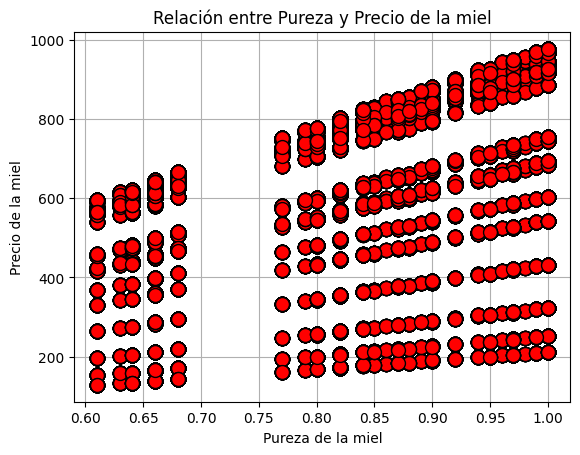

In [157]:
plotData(X, y)

In [ ]:
# ?pyplot.plot

# <a id="section2"></a>
### 1.2 Descenso por el gradiente

#### 1.2.1 Ecuaciones de actualización

El objetivo de la regresion lineal es minimizar la funcion de costo

$$ J(\theta) = \frac{1}{2m} \sum_{i=1}^m \left( h_{\theta}(x^{(i)}) - y^{(i)}\right)^2$$

donde la hipotesis $h_\theta(x)$ esta dada por el modelo lineal
$$ h_\theta(x) = \theta^Tx = \theta_0 + \theta_1 x_1$$

Los parametros del modelo son los valores $\theta_j$. Estos son los valores que se ajustaran al costo minimo $J(\theta)$. Un camino para lograr esto es usar el algoritmo por lotes del descenso por el gradiente. En el descenso por el gradiente por lotes, cada iteracion ejecuta una actualizacion
$$ \theta_j = \theta_j - \alpha \frac{1}{m} \sum_{i=1}^m \left( h_\theta(x^{(i)}) - y^{(i)}\right)x_j^{(i)} \qquad \text{actualizacion simultanea } \theta_j \text{ for all } j$$

Con cada paso del descenso por el gradiente, los parametros $\theta_j$ son mas cercanos a los valores optimos que permitiran lograr el costo mas bajo J($\theta$).

#### 1.2.2 Implementación

In [158]:
# Agrega una columna de unos a X. La funcion stack de numpy une matrices a lo largo de un eje dado.
# El primer eje (eje = 0) se refiere a filas (ejemplos de entrenamiento)
# y el segundo eje (eje = 1) se refiere a columnas (características).

X = np.stack([np.ones(m), X], axis=1)
# Agregar columna de unos para el término theta0

In [159]:
print(X)

[[1.   0.68]
 [1.   0.89]
 [1.   0.66]
 ...
 [1.   0.64]
 [1.   0.97]
 [1.   0.64]]


<a id="section2"></a>
#### 1.2.3 Cálculo del costo $J(\theta)$

In [160]:
def calcularCosto(X, y, theta):
    # inicializa algunos valores importantes
    m = y.size  # numero de ejemplos de entrenamiento

    J = 0
    # h = np.dot(X, theta)
    J = (1/(2 * m)) * np.sum(np.square(np.dot(X, theta) - y))
    return J

Ejemplo de funcionamiento de la funcion computeCoste con dos valores diferentes de $\theta$.

In [161]:
J = calcularCosto(X, y, theta=np.array([0.0, 0.0]))
print('Con theta = [0, 0] \n Costo calculado = %.2f' % J)
# print('Valor de costo esperado (aproximadamente) 32.07\n')

# pruebas adicionales de la función de costes
J = calcularCosto(X, y, theta=np.array([0.5, 0.5]))
print('Con theta = [0.5, 0.5]\n Costo calculado = %.2f' % J)
# print('Valor de costo esperado (aproximadamente)  54.24')

J = calcularCosto(X, y, theta=np.array([0.6, 0.6]))
print('Con theta = [0.6, 0.6]\n Costo calculado = %.2f' % J)

J = calcularCosto(X, y, theta=np.array([0.7, 0.7]))
print('Con theta = [0.7, 0.7]\n Costo calculado = %.2f' % J)

J = calcularCosto(X, y, theta=np.array([0.8, 0.8]))
print('Con theta = [0.8, 0.8]\n Costo calculado = %.2f' % J)

J = calcularCosto(X, y, theta=np.array([0.75, 0.75]))
print('Con theta = [0.75, 0.75]\n Costo calculado = %.2f' % J)

Con theta = [0, 0] 
 Costo calculado = 204188.97
Con theta = [0.5, 0.5]
 Costo calculado = 203639.74
Con theta = [0.6, 0.6]
 Costo calculado = 203529.99
Con theta = [0.7, 0.7]
 Costo calculado = 203420.28
Con theta = [0.8, 0.8]
 Costo calculado = 203310.60
Con theta = [0.75, 0.75]
 Costo calculado = 203365.44


<a id="section3"></a>
#### 1.2.4 Descenso por el gradiente

El costo $J(\theta)$ esta parametrizado por el vector $\theta$, no $X$ y $y$. Donde hay que minimizar el valor de $J(\theta)$ cambiando los valores del vector $\theta$. Una buena manera de verificar si el descenso por el gradiente esta trabajando correctamente es ver los valores de $J(\theta)$ y verificar si estos decresen en cada paso.

<div class="alert alert-box alert-warning">
**Vectores y matrices en `numpy`** - Importantes notas para implementación
Un vector en `numpy` es un array de una diemension, por ejemplo `np.array([1, 2, 3])` es un vector. Una matriz en `numpy` is un arreglo de dos dimensiones, por ejemplo  `np.array([[1, 2, 3], [4, 5, 6]])`. Sin embargo, lo siguiente todavía se considera una matriz `np.array ([[1, 2, 3]])` ya que tiene dos dimensiones, incluso si tiene una forma de 1x3 (que parece un vector).

In [162]:
def gradientDescent(X, y, theta, alpha, num_iters):
        # Inicializa algunos valores importantes
    m = y.shape[0]  # numero de ejemplos de entrenamiento

    # hace una copia de theta, para evitar cambiar la matriz original,
    # ya que las matrices numpy se pasan por referencia a las funciones

    theta = theta.copy()

    J_history = [] # Lista que se utiliza para almacenar el costo en cada iteración

    for i in range(num_iters):
        theta = theta - (alpha / m) * (np.dot(X, theta) - y).dot(X)
        # save the cost J in every iteration
        J_history.append(calcularCosto(X, y, theta))

    return theta, J_history

Se inicializan los parametros $\theta$ con 0 y la taza de aprendizaje $\alpha$ con 0.01.

In [163]:
# inicializa los parametros de ajuste
theta = np.zeros(2)

# configuraciones para el descenso por el gradiente
iterations =5000
alpha = 0.001

theta, J_history = gradientDescent(X ,y, theta, alpha, iterations)
print('Theta encontrada por descenso gradiente: {:.4f}, {:.4f}'.format(*theta))
print(J_history)

Theta encontrada por descenso gradiente: 334.7892, 319.9375
[np.float64(203581.17691064655), np.float64(202975.43196064094), np.float64(202371.72974505802), np.float64(201770.06337478524), np.float64(201170.42598394377), np.float64(200572.81072980983), np.float64(199977.2107927367), np.float64(199383.61937607688), np.float64(198792.02970610463), np.float64(198202.43503193857), np.float64(197614.82862546438), np.float64(197029.20378125878), np.float64(196445.55381651205), np.float64(195863.87207095252), np.float64(195284.1519067701), np.float64(194706.3867085408), np.float64(194130.569883151), np.float64(193556.69485972245), np.float64(192984.75508953724), np.float64(192414.7440459628), np.float64(191846.65522437758), np.float64(191280.48214209714), np.float64(190716.21833829957), np.float64(190153.85737395228), np.float64(189593.39283173814), np.float64(189034.8183159825), np.float64(188478.12745258003), np.float64(187923.31388892198), np.float64(187370.37129382425), np.float64(186819.

Se utilizan los parametros finales para grafical la linea.

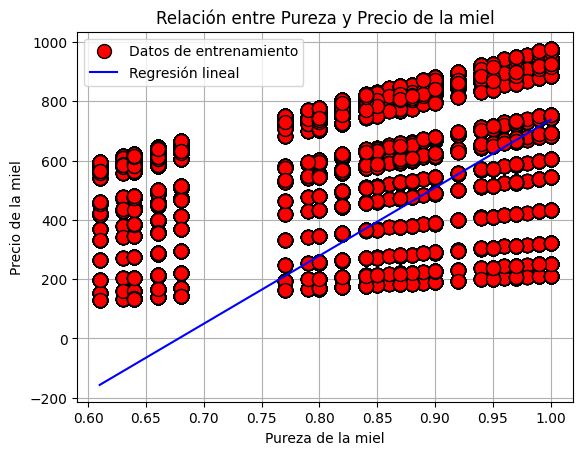

In [164]:
# Generar puntos en escala original usando Pureza (columna original, no matriz X)
x_vals = np.linspace(np.min(data[:,0]), np.max(data[:,0]), 100)

# Normalizar para usarlos en predicción
x_vals_norm = (x_vals - mu) / sigma

# Predicciones
y_vals = theta[0] + theta[1] * x_vals_norm

# Graficar scatter y la recta
plotData(data[:,0], y)   # usamos pureza original
pyplot.plot(x_vals, y_vals, '-', color='blue')
pyplot.legend(['Datos de entrenamiento', 'Regresión lineal'])
pyplot.show()


Los valores finales de $\theta$ se utilizaran para realizar predicciones.

In [166]:
# Ejemplo: predecir precio de la miel con Pureza = 0.85
predict1 = np.dot([1, 0.85], theta)
print('Para Pureza = 0.85, el precio predicho es {:.2f}'.format(predict1))

# Ejemplo: predecir precio de la miel con Pureza = 0.90
predict2 = np.dot([1, 0.90], theta)
print('Para Pureza = 0.90, el precio predicho es {:.2f}'.format(predict2))


Para Pureza = 0.85, el precio predicho es 606.74
Para Pureza = 0.90, el precio predicho es 622.73


### 1.4 Visualizar $J(\theta)$

Para comprender mejor la función de costo $J(\theta)$, se graficará la funcion de costo en 2 dimenciones con los valores de $\theta_0$ y $\theta_1$.

El proposito de graficar el costo para observar como $J(\theta)$ varia con cambios en $\theta_0$ y $\theta_1$. La función de costo  $J(\theta)$ tiene forma de una cuenca con un minimo global. (Esto es mas facil observar en los contornos de una superficie 3D). El minimo es el punto optimo para $\theta_0$ y $\theta_1$, en cada paso del descenso por el gradiente se mueve mas cerca a este punto.

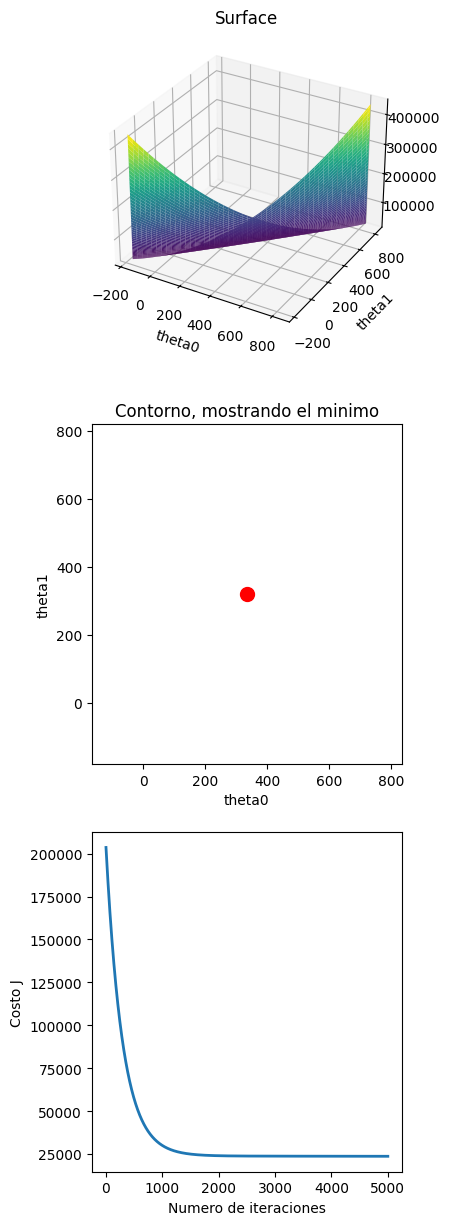

In [167]:
# cuadrícula sobre la que se calcula J
theta0_vals = np.linspace(theta[0] - 500, theta[0] + 500, 100)
theta1_vals = np.linspace(theta[1] - 500, theta[1] + 500, 100)
#theta0_vals = np.linspace(-10, 10, 100)
#theta1_vals = np.linspace(-1, 4, 100)

# inicializa J_vals con una matriz de 0's
J_vals = np.zeros((theta0_vals.shape[0], theta1_vals.shape[0]))

# Completar J_vals
for i, theta0 in enumerate(theta0_vals):
    for j, theta1 in enumerate(theta1_vals):
        J_vals[i, j] = calcularCosto(X, y, [theta0, theta1])

# Debido a la forma en que funcionan las cuadrículas en el comando surf,
# se necesita transponer J_vals antes de llamar a surf, o de lo contrario los ejes se invertirán
J_vals = J_vals.T

# graficar la superficie
fig = pyplot.figure(figsize=(4, 15))
ax = fig.add_subplot(311, projection='3d')
ax.plot_surface(theta0_vals, theta1_vals, J_vals, cmap='viridis')
pyplot.xlabel('theta0')
pyplot.ylabel('theta1')
pyplot.title('Surface')

# graficar contornos
# Grafica J_vals como 15 contours spaciados logaritmicamente entre 0.01 y 100
ax = pyplot.subplot(312)
pyplot.contour(theta0_vals, theta1_vals, J_vals, linewidths=2, cmap='viridis', levels=np.logspace(-2, 3, 20))
pyplot.xlabel('theta0')
pyplot.ylabel('theta1')
pyplot.plot(theta[0], theta[1], 'ro', ms=10, lw=2)
pyplot.title('Contorno, mostrando el minimo')


# Grafica la convergencia del costo
ax = pyplot.subplot(313)
pyplot.plot(np.arange(len(J_history)), J_history, lw=2)
pyplot.xlabel('Numero de iteraciones')
pyplot.ylabel('Costo J')

pass